## The case study has two parts: 
- Descriptive statistics
- Inferential statistics


### Let's get started!

---

### Part I: <span style="color:blue">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span> 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
'%matplotlib inline'
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

---------------------------------------------------------------------------

### Step 2: <span style="color:green">Descriptive Statistics</span> 
- Southern Water Corp has been split into three files: Desalination_Unit_File 001, Desalination_Unit_File_002, and Desalination_Unit_File_003. 
- I'll need to merge them into a complete dataframe for this analysis. To do this, follow the steps below: 

In [2]:
# i. Import each of the three separate files.
df_1 = pd.read_csv('Desalination_Unit_File_001.csv', header=[1], squeeze=True)
df_2 = pd.read_excel('Desalination_Unit_File_002.xlsx', header=[1], squeeze=True)
df_3 = pd.read_excel('Desalination_Unit_File_003.xlsx', header=[1], squeeze=True)

In [3]:
# ii. Merge them into one dataframe and change names of columns.
df_0 = [df_1, df_2, df_3]
df_all = pd.concat(df_0)
df_all.dropna(inplace=True)
df_all=df_all.reset_index(drop=True)
df_all.rename(columns={'SURJEK_FLOW_METER_1': 'Flow Meter 1 (m3/d)', 
                       'SURJEK_FLOW_METER_2': 'Flow Meter 2 (m3/d)', 
                       'ROTATIONAL_PUMP_RPM': 'Rotational Pump (rpm)', 
                       'SURJEK_PUMP_TORQUE': 'Pump Torque (nw mtrs)', 
                       'MAXIMUM_DAILY_PUMP_TORQUE': 'Max Daily Pump Torque (nw mtrs)', 
                       'SURJEK_AMMONIA_FLOW_RATE': 'Ammonia Flow Rate (m3/d)', 
                       'SURJEK_TUBE_PRESSURE': 'Tube Pressure (psi)', 
                       'SURJEK_ESTIMATED_EFFICIENCY': 'Estimated Efficiency (%)', 
                       'PUMP FAILURE (1 or 0)': 'Pump Failure (1 or 0)', 'TIMEFRAME': 'Time (s)'},
                     inplace=True)

In [4]:
# iii. Print info on my combined dataframe using .info()
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6997 entries, 0 to 6996
Data columns (total 10 columns):
Flow Meter 1 (m3/d)                6997 non-null float64
Flow Meter 2 (m3/d)                6997 non-null float64
Rotational Pump (rpm)              6997 non-null float64
Pump Torque (nw mtrs)              6997 non-null float64
Max Daily Pump Torque (nw mtrs)    6997 non-null float64
Ammonia Flow Rate (m3/d)           6997 non-null float64
Tube Pressure (psi)                6997 non-null float64
Estimated Efficiency (%)           6997 non-null float64
Pump Failure (1 or 0)              6997 non-null float64
Time (s)                           6997 non-null object
dtypes: float64(9), object(1)
memory usage: 546.8+ KB


In [5]:
# iiii. Print descriptive statistics on my combined dataframe using .describe()
df_all.describe()

,Flow Meter 1 (m3/d),Flow Meter 2 (m3/d),Rotational Pump (rpm),Pump Torque (nw mtrs),Max Daily Pump Torque (nw mtrs),Ammonia Flow Rate (m3/d),Tube Pressure (psi),Estimated Efficiency (%),Pump Failure (1 or 0)
count,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.0,6997.000000,6997.000000,6997.000000
mean,5.947058,5.159499,6.608110,39.097537,427.357071,0.0,380.696922,0.646810,0.009290
std,20.352811,24.445774,20.844371,124.182122,473.256491,0.0,6.817500,0.755601,0.095941
min,-0.527344,-9.118652,-1.000000,-2.436085,-2.278918,0.0,0.000000,0.000000,0.000000
25%,0.000000,-4.765337,-0.687126,-2.030355,9.283683,0.0,379.028300,0.000000,0.000000
50%,0.314582,-0.351562,-0.013292,-1.896799,285.493400,0.0,381.317401,0.204232,0.000000
75%,0.704173,0.981556,0.000000,-1.680896,285.493400,0.0,382.690400,1.240822,0.000000
max,127.221700,313.989300,99.000000,1284.681000,1284.838000,0.0,386.352500,2.000000,1.000000


---------------------------------------------------------------------------

### Step 3: <span style="color:green">Create a Boxplot</span> 

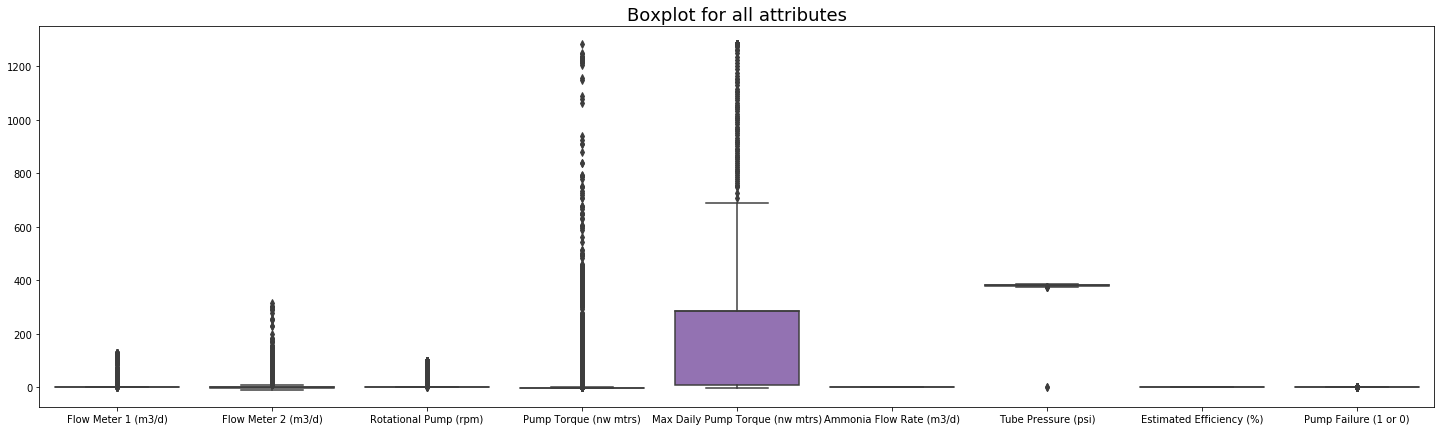

In [6]:
# i) Create a boxplot from your combined dataframe using matplotlib and seaborn with all the variables plotted out.
plt.figure(figsize=(25,7))
sns.boxplot(data=df_all)
plt.title('Boxplot for all attributes', fontsize=18)
plt.show()

#### Probably note that it might seem that some variables, due to their range and size of values, dwarfs some of the other variables which makes the variation difficult to see.
#### Perhaps, I should remove these variables and look at the box plot again?

---------------------------------------------------------------------------

### Step 4: <span style="color:green">Create a Filtered Boxplot</span> 

**Open-ended question:** Beyond pump torque and max daily pump torque, do any other attributes seem to 'stand out'?

In [7]:
# i. Filter out SURJEK_PUMP_TORQUE and MAXIMUM_DAILY_PUMP_TORQUE and create a new dataframe named 'df_filt'. 
df_all_filt =df_all.filter(['Flow Meter 1 (m3/d)', 'Flow Meter 2 (m3/d)', 'Rotational Pump (rpm)', 
                            'Ammonia Flow Rate (m3/d)', 'Tube Pressure (psi)', 'Estimated Efficiency (%)', 
                            'Pump Failure (1 or 0)', 'Time (s)']) 

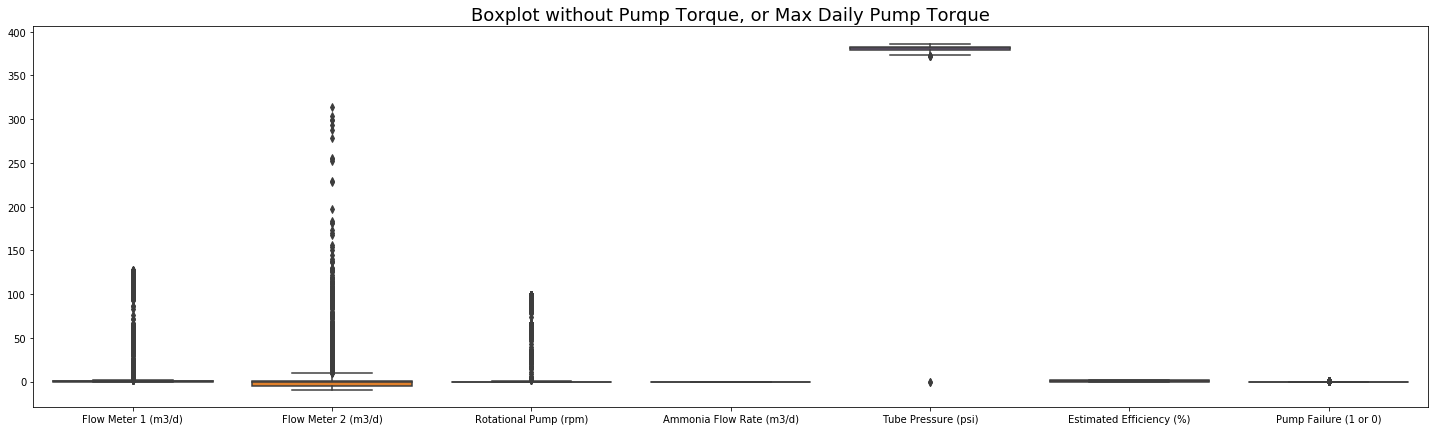

In [8]:
# ii. Create a Boxplot for df_filt.
plt.figure(figsize=(25,7))
sns.boxplot(data=df_all_filt)
plt.title('Boxplot without Pump Torque, or Max Daily Pump Torque', fontsize=18)
plt.show()

#### Answer:  Yes, these Flow Meter 1 (m3/d), Flow Meter 2 (m3/d), Rotational Pump (rpm), Pump Torque (nw mtrs) and Max Daily Pump Torque (nw mtrs) variables stand for.
---

### Step 5: <span style="color:green">Filter Your Boxplot by Column Value</span> 

**Open-ended Question:** What variables seem to have the largest variation when the Pump has failed?


In [9]:
# i. The whole dataset
df_filt =df_all.filter(['Flow Meter 1 (m3/d)', 'Flow Meter 2 (m3/d)', 'Rotational Pump (rpm)','Pump Torque (nw mtrs)', 
                          'Max Daily Pump Torque (nw mtrs)', 'Ammonia Flow Rate (m3/d)', 'Tube Pressure (psi)', 
                            'Estimated Efficiency (%)'])

In [10]:
# ii. Filter the Boxplot by Pump Failure Value.
df_filt1=df_filt.loc[df_all['Pump Failure (1 or 0)'] == 1]
df_filt0=df_filt.loc[df_all['Pump Failure (1 or 0)'] == 0]

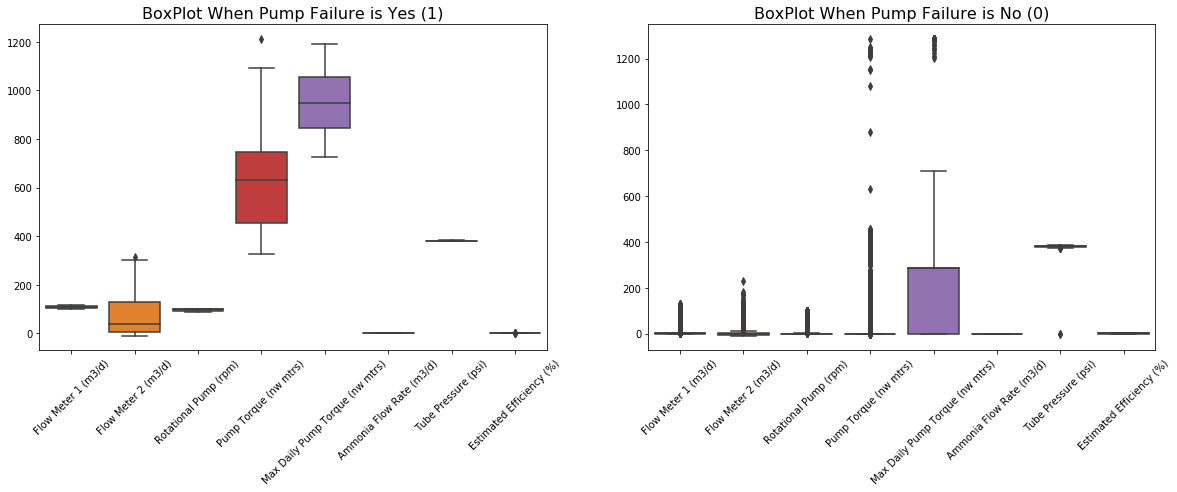

In [11]:
# ii. Create Boxplots
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_filt1)
plt.title('BoxPlot When Pump Failure is Yes (1)', fontsize=16)
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.boxplot(data=df_filt0)
plt.title('BoxPlot When Pump Failure is No (0)', fontsize=16)
plt.xticks(rotation=45)
plt.show()

#### Answer: Pump Torque (nw mtrs) variable seems to have the largest variation when the Pump has failed.
---

### From analysing the boxplots, I'll notice that there seem to be a number of outliers.
I used the interquartile ranges to remove the outliers from each column. Happily, Python allows me to do this process more quickly and efficiently, as they'll be seen when working on  <span style="color:green">Step 6</span>.

### Step 6: <span style="color:green">Create Quartiles</span> 

In [12]:
# i. Create the 25th percentile (q1_perc) and the 75th percentile (q3_perc) for all columns in the dataframe.
q1_perc = df_filt.quantile(0.25, numeric_only=True)
q3_perc = df_filt.quantile(0.75, numeric_only=True)

In [13]:
# ii. Create the 50th percentile (IQR = q3 - q1).
IQR = q3_perc - q1_perc
print('The interquartile range (IQR) for all variables:')
print('-----------------------------------------------')
print(IQR)

The interquartile range (IQR) for all variables:
-----------------------------------------------
Flow Meter 1 (m3/d)                  0.704173
Flow Meter 2 (m3/d)                  5.746893
Rotational Pump (rpm)                0.687126
Pump Torque (nw mtrs)                0.349459
Max Daily Pump Torque (nw mtrs)    276.209717
Ammonia Flow Rate (m3/d)             0.000000
Tube Pressure (psi)                  3.662100
Estimated Efficiency (%)             1.240822
dtype: float64


---------------------------------------------------------------------------

### Step 7: <span style="color:green">Identify Outliers</span> 

In [14]:
# i. Remove the outliers.
df_no_out = df_filt[~((df_filt < (q1_perc - 1.5 * IQR)) |(df_filt > (q3_perc + 1.5 * IQR))).any(axis=1)]

In [15]:
# ii. Calculate the entire entries.
print ("When we have not removed any outliers from the dataset, we have " + str(len(df_all)) + " entries")

# iii. Calculate the entries after removed the outliers.
print ("When we have not removed any outliers from the dataset, we have " + str(len(df_no_out)) + " entries")

# iiii. Find the proportion of outliers that exist in the dataset
print ("The proportion of outliers which exist when compared to the dataframe are: " 
       + str(round(len(df_no_out)/len(df_all), 3)))

When we have not removed any outliers from the dataset, we have 6997 entries
When we have not removed any outliers from the dataset, we have 3854 entries
The proportion of outliers which exist when compared to the dataframe are: 0.551


##### When we have not removed any outliers from the dataset, we have 11998 entries.
#### When we have not removed any outliers from the dataset, we have 8855 entries.
#### The proportion of outliers which exist when compared to the dataframe are: 0.738.

---------------------------------------------------------------------------

### Step 8: <span style="color:green">Create a Boxplot without Outliers</span> 

In [16]:
# i. Create datasets without the outliers when Pump Failure is 1 (Yes) and 0 (No).
df_no_out1 = df_filt1[~((df_filt1 < (q1_perc - 1.5 * IQR)) |(df_filt1 > (q3_perc + 1.5 * IQR))).any(axis=1)]
df_no_out0 = df_filt0[~((df_filt0 < (q1_perc - 1.5 * IQR)) |(df_filt0 > (q3_perc + 1.5 * IQR))).any(axis=1)]

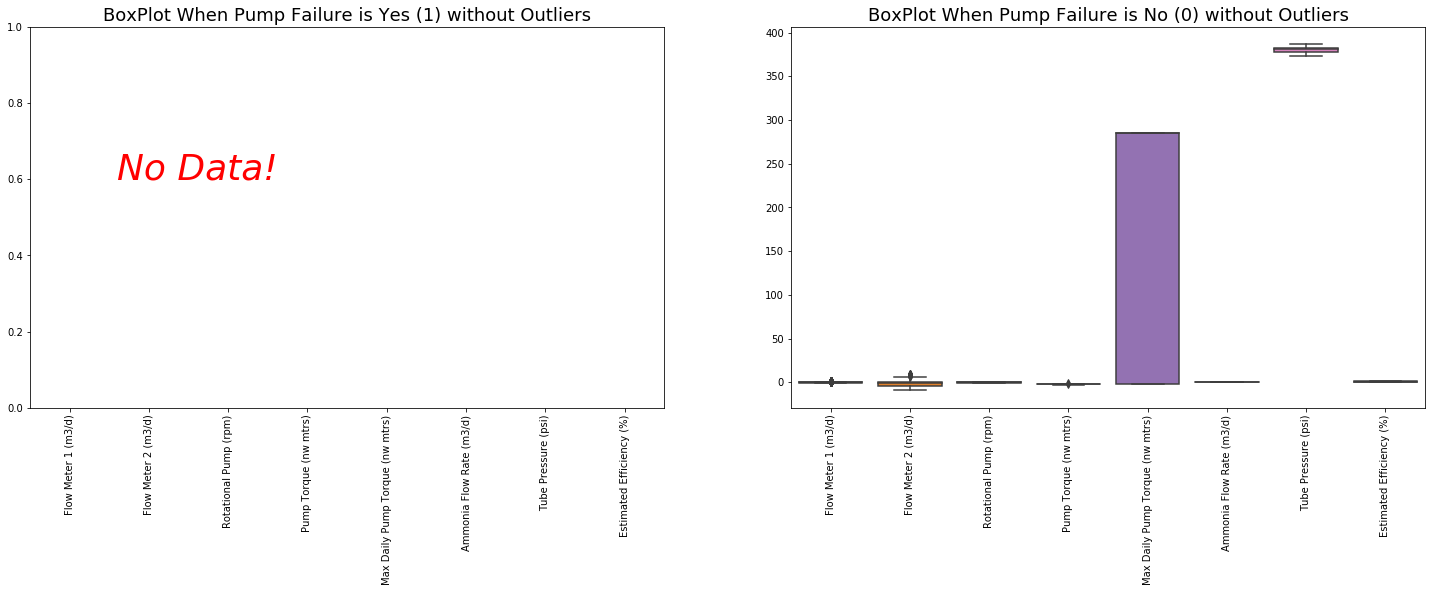

In [17]:
# ii. Creat Boxplots when Pump Failure is 1 (Yes) and 0 (No)
plt.figure(figsize=(25,7))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_no_out1)
plt.title('BoxPlot When Pump Failure is Yes (1) without Outliers', fontsize=18)
plt.text(0.6,0.6, "No Data!", 
         fontsize = 36, color="red", fontstyle='italic')
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
sns.boxplot(data=df_no_out0)
plt.title('BoxPlot When Pump Failure is No (0) without Outliers', fontsize=18)
plt.xticks(rotation=90)
plt.show()

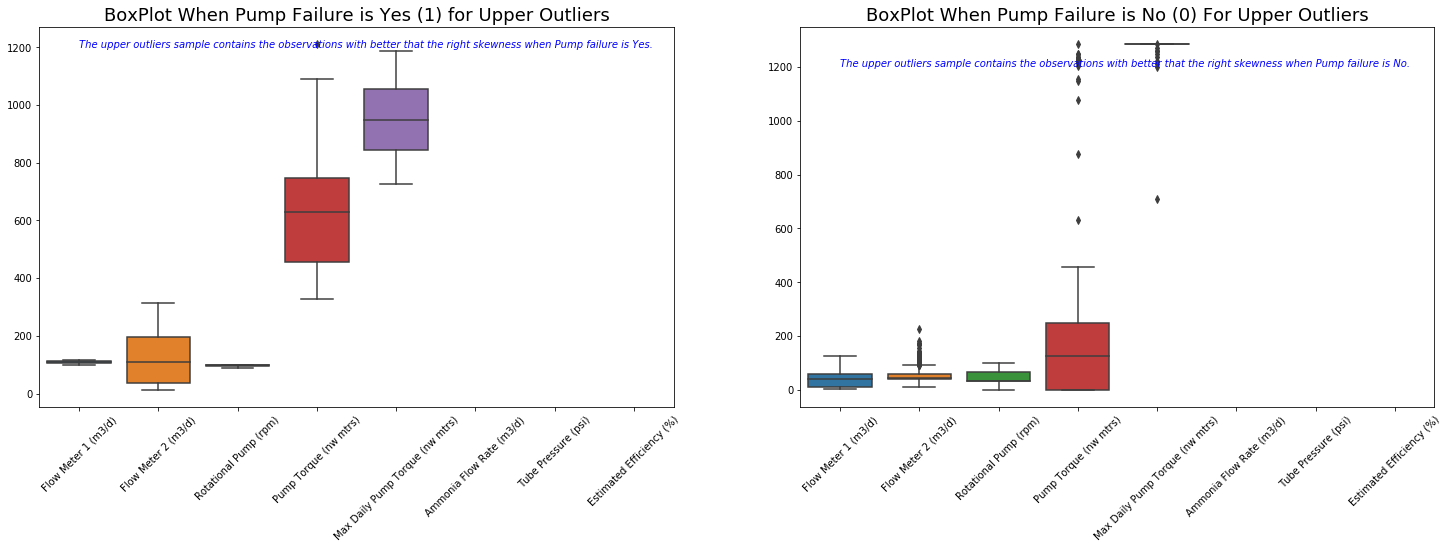

In [18]:
# iii. Create some extra works.
df_upper_out1=df_filt1[df_filt1 > (q3_perc + 1.5*IQR)]
df_upper_out0=df_filt0[df_filt0 > (q3_perc + 1.5*IQR)]
plt.figure(figsize=(25,7))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_upper_out1)
plt.title('BoxPlot When Pump Failure is Yes (1) for Upper Outliers', fontsize=18)
plt.xticks(rotation=45)
plt.text(0,1200, "The upper outliers sample contains the observations with better that the right skewness when Pump failure is Yes.", 
         fontsize = 10, color="blue", fontstyle='italic')
plt.subplot(1, 2, 2)
sns.boxplot(data=df_upper_out0)
plt.title('BoxPlot When Pump Failure is No (0) For Upper Outliers', fontsize=18)
plt.xticks(rotation=45)
plt.text(0,1200, "The upper outliers sample contains the observations with better that the right skewness when Pump failure is No.", 
         fontsize = 10, color="blue", fontstyle='italic')
plt.show()

### Based on the boxplots I've created, I've likely come to the conclusion that, for this case study, I actually _shouldn't_ remove the outliers, as I am attempting to understand the Pump Failure Behavior.

-----

### Step 9: <span style="color:green">Plot and Examine Each Column</span> 

In [19]:
# i. Find the minimum (min) and maximum (max) time in the dataframe.
df_all['Time (s)'] = pd.to_datetime(df_all['Time (s)'])
min_time = str(df_all['Time (s)'].min())
max_time = str(df_all['Time (s)'].max())

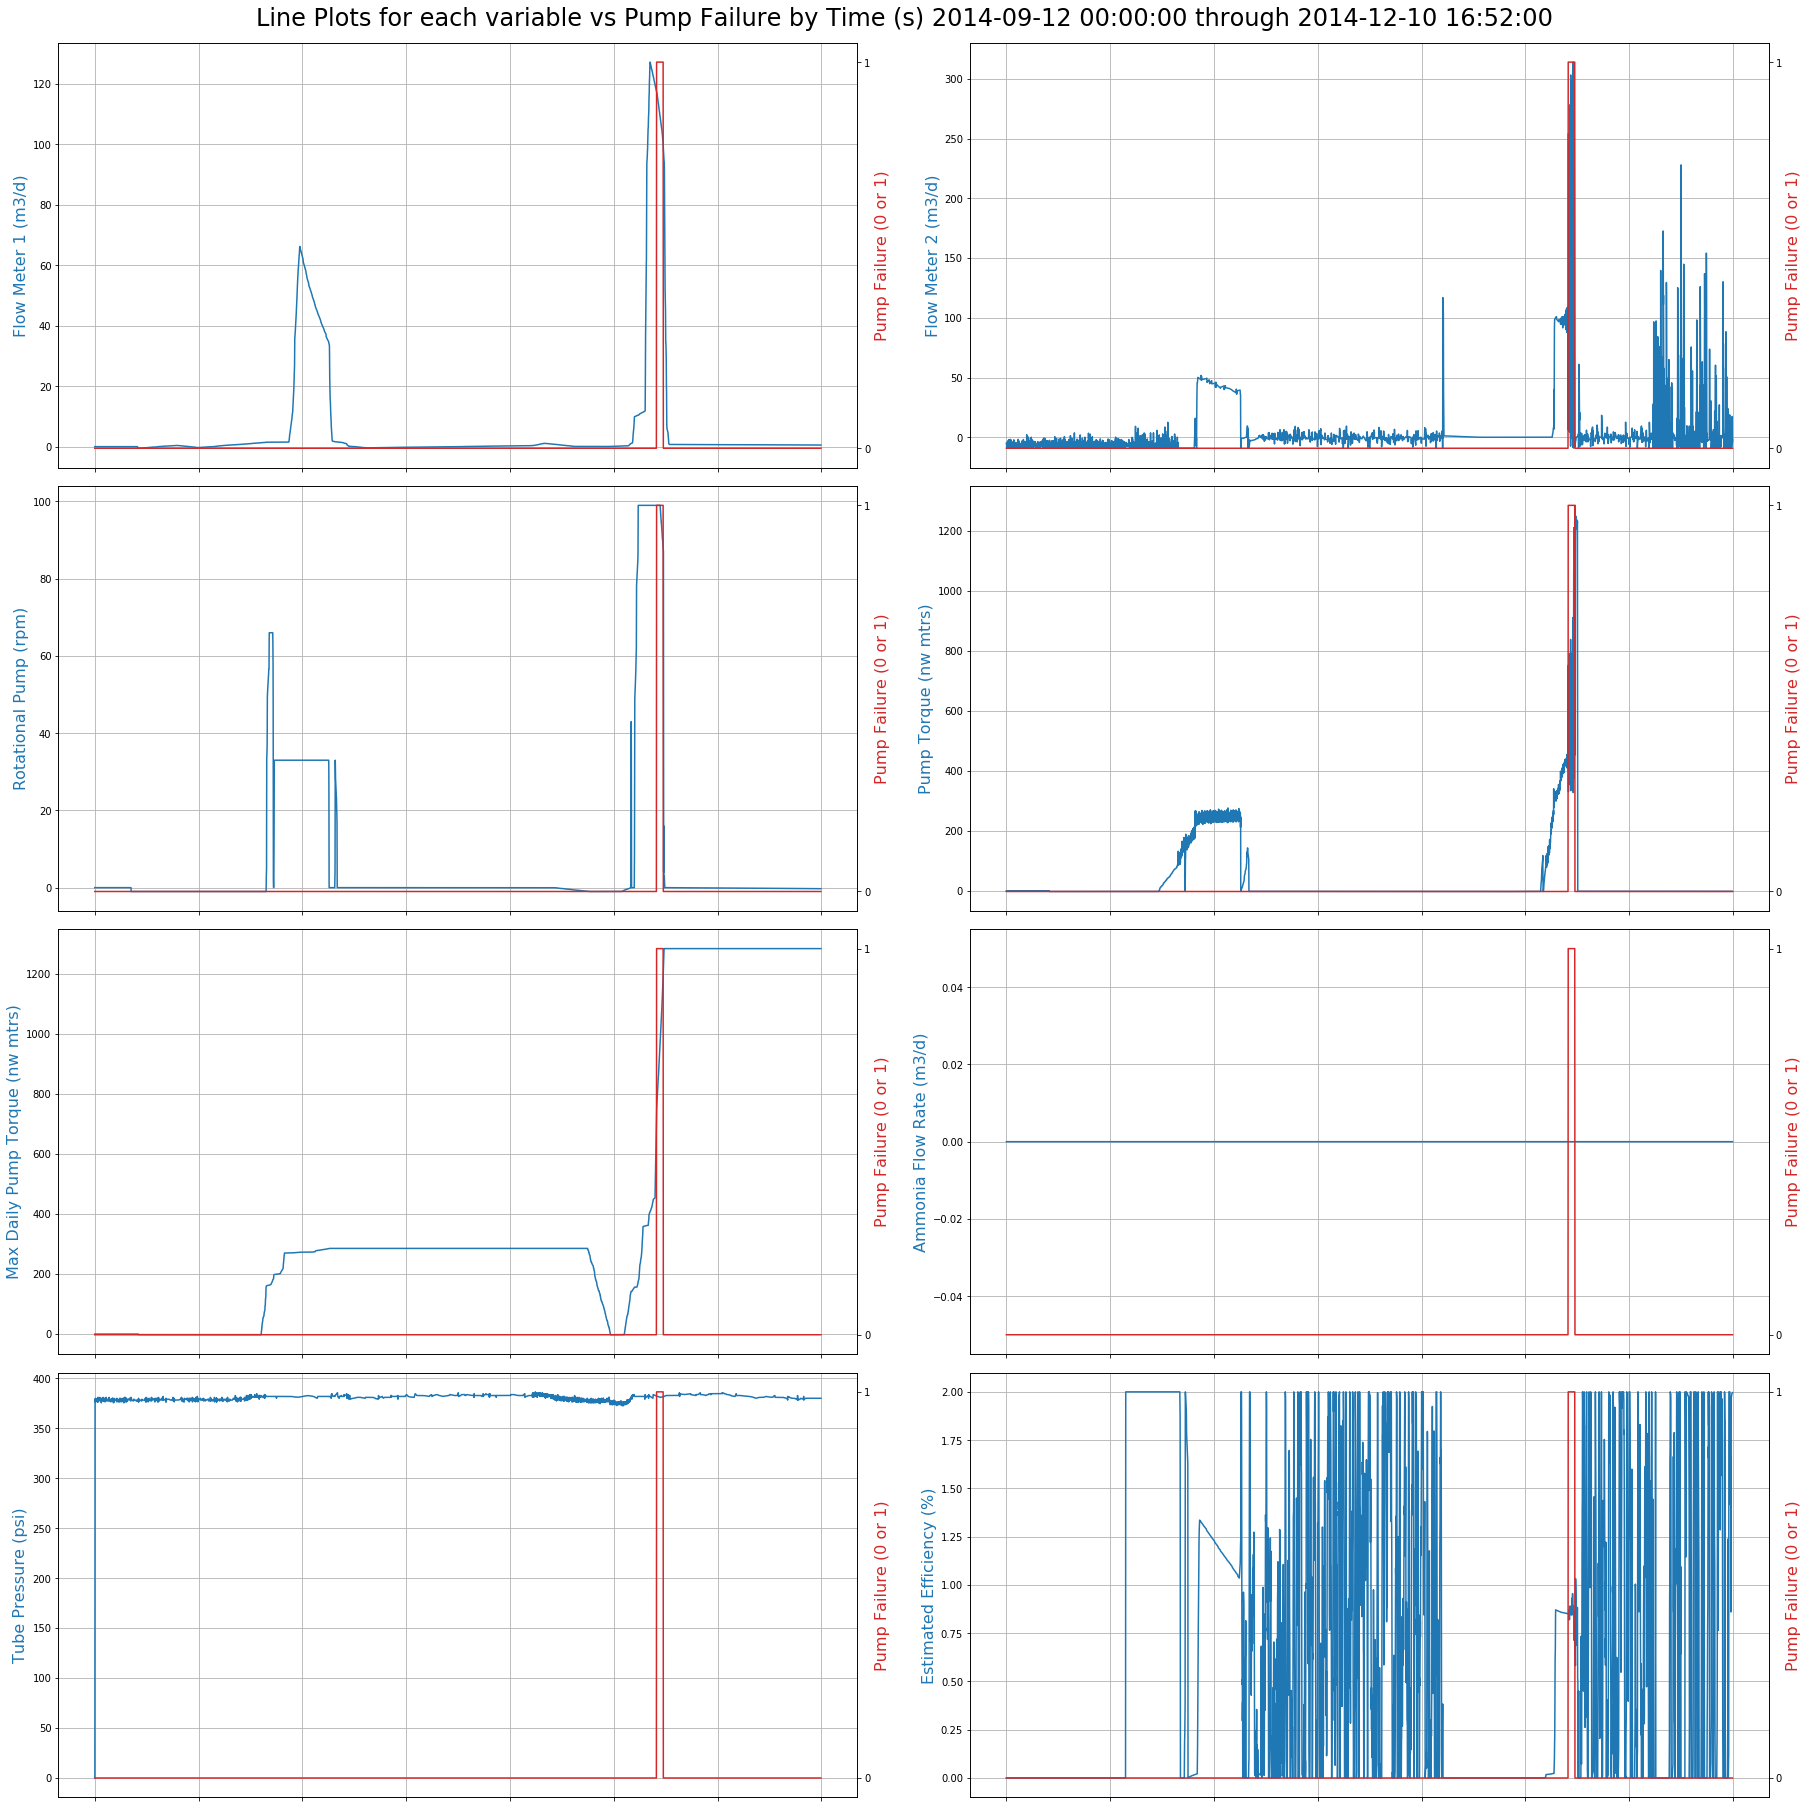

In [20]:
# ii. Using a loop, iterate through each of the Column Names and plot the data.
fig, axes = plt.subplots(4, 2, figsize=(25,25), constrained_layout=True)
fig.suptitle('Line Plots for each variable vs Pump Failure by Time (s) ' + min_time + ' through ' + max_time, size=24)
axes=axes.flatten()
ax1_col='tab:blue'
ax2_col='tab:red'
for i, y in enumerate(df_filt):
    ax1=axes[i]
    ax1.set_ylabel(y, color=ax1_col, size=16)
    ax1.plot(df_filt.index, df_filt[y], color=ax1_col)
    plt.setp(ax1.get_xticklabels(), visible=False)
    ax1.grid(True)
    ax2=ax1.twinx()
    ax2.grid(False)
    ax2.set_ylabel('Pump Failure (0 or 1)', color=ax2_col, size=16)
    ax2.plot(df_filt.index, df_all['Pump Failure (1 or 0)'], color=ax2_col)
    plt.yticks((0,1))


Of course, given that all the attributes have varying units, I might need more than one plot to make sense of all this data. For this next step, let's view the information by comparing the <b>ROLILNG DEVIATIONS</b> over a 30-point period.

As the deviations will likely be a lot lower, the scale should be much simpler to view on one plot.
Make sure that I included the 'PUMP FAILURE 1 or 0' attribute on the secondary Y-axis. 


---

### Step 10: <span style="color:green">Create a Plot for Pump Failures Over a Rolling Time Period</span> 
**Open-ended Question:** Do any particular variables seem to move in relation to the failure event?

In [21]:
# i. Apply a rolling standard deviation to the dataframe using a rolling window size of '30'.
df_roll_std30 = df_filt.rolling(window=30).std()

In [22]:
# ii. Re-plot all variables for the time period 10/12/2014 14:40 to 10/12/2014 14:45, 
# focusing specifically on the first Pump “Failure”.
df_time_fltr = df_all.loc[(df_all['Time (s)'] >= '2014-12-10 14:40:00') & (df_all['Time (s)'] <= '2014-12-10 14:45:00')]
min_time_fltr = str(df_time_fltr['Time (s)'].min())
max_time_fltr = str(df_time_fltr['Time (s)'].max())
df_roll_fltr = df_roll_std30.loc[(df_all['Time (s)'] >= '2014-12-10 14:40:00') & (df_all['Time (s)'] <= '2014-12-10 14:45:00')]

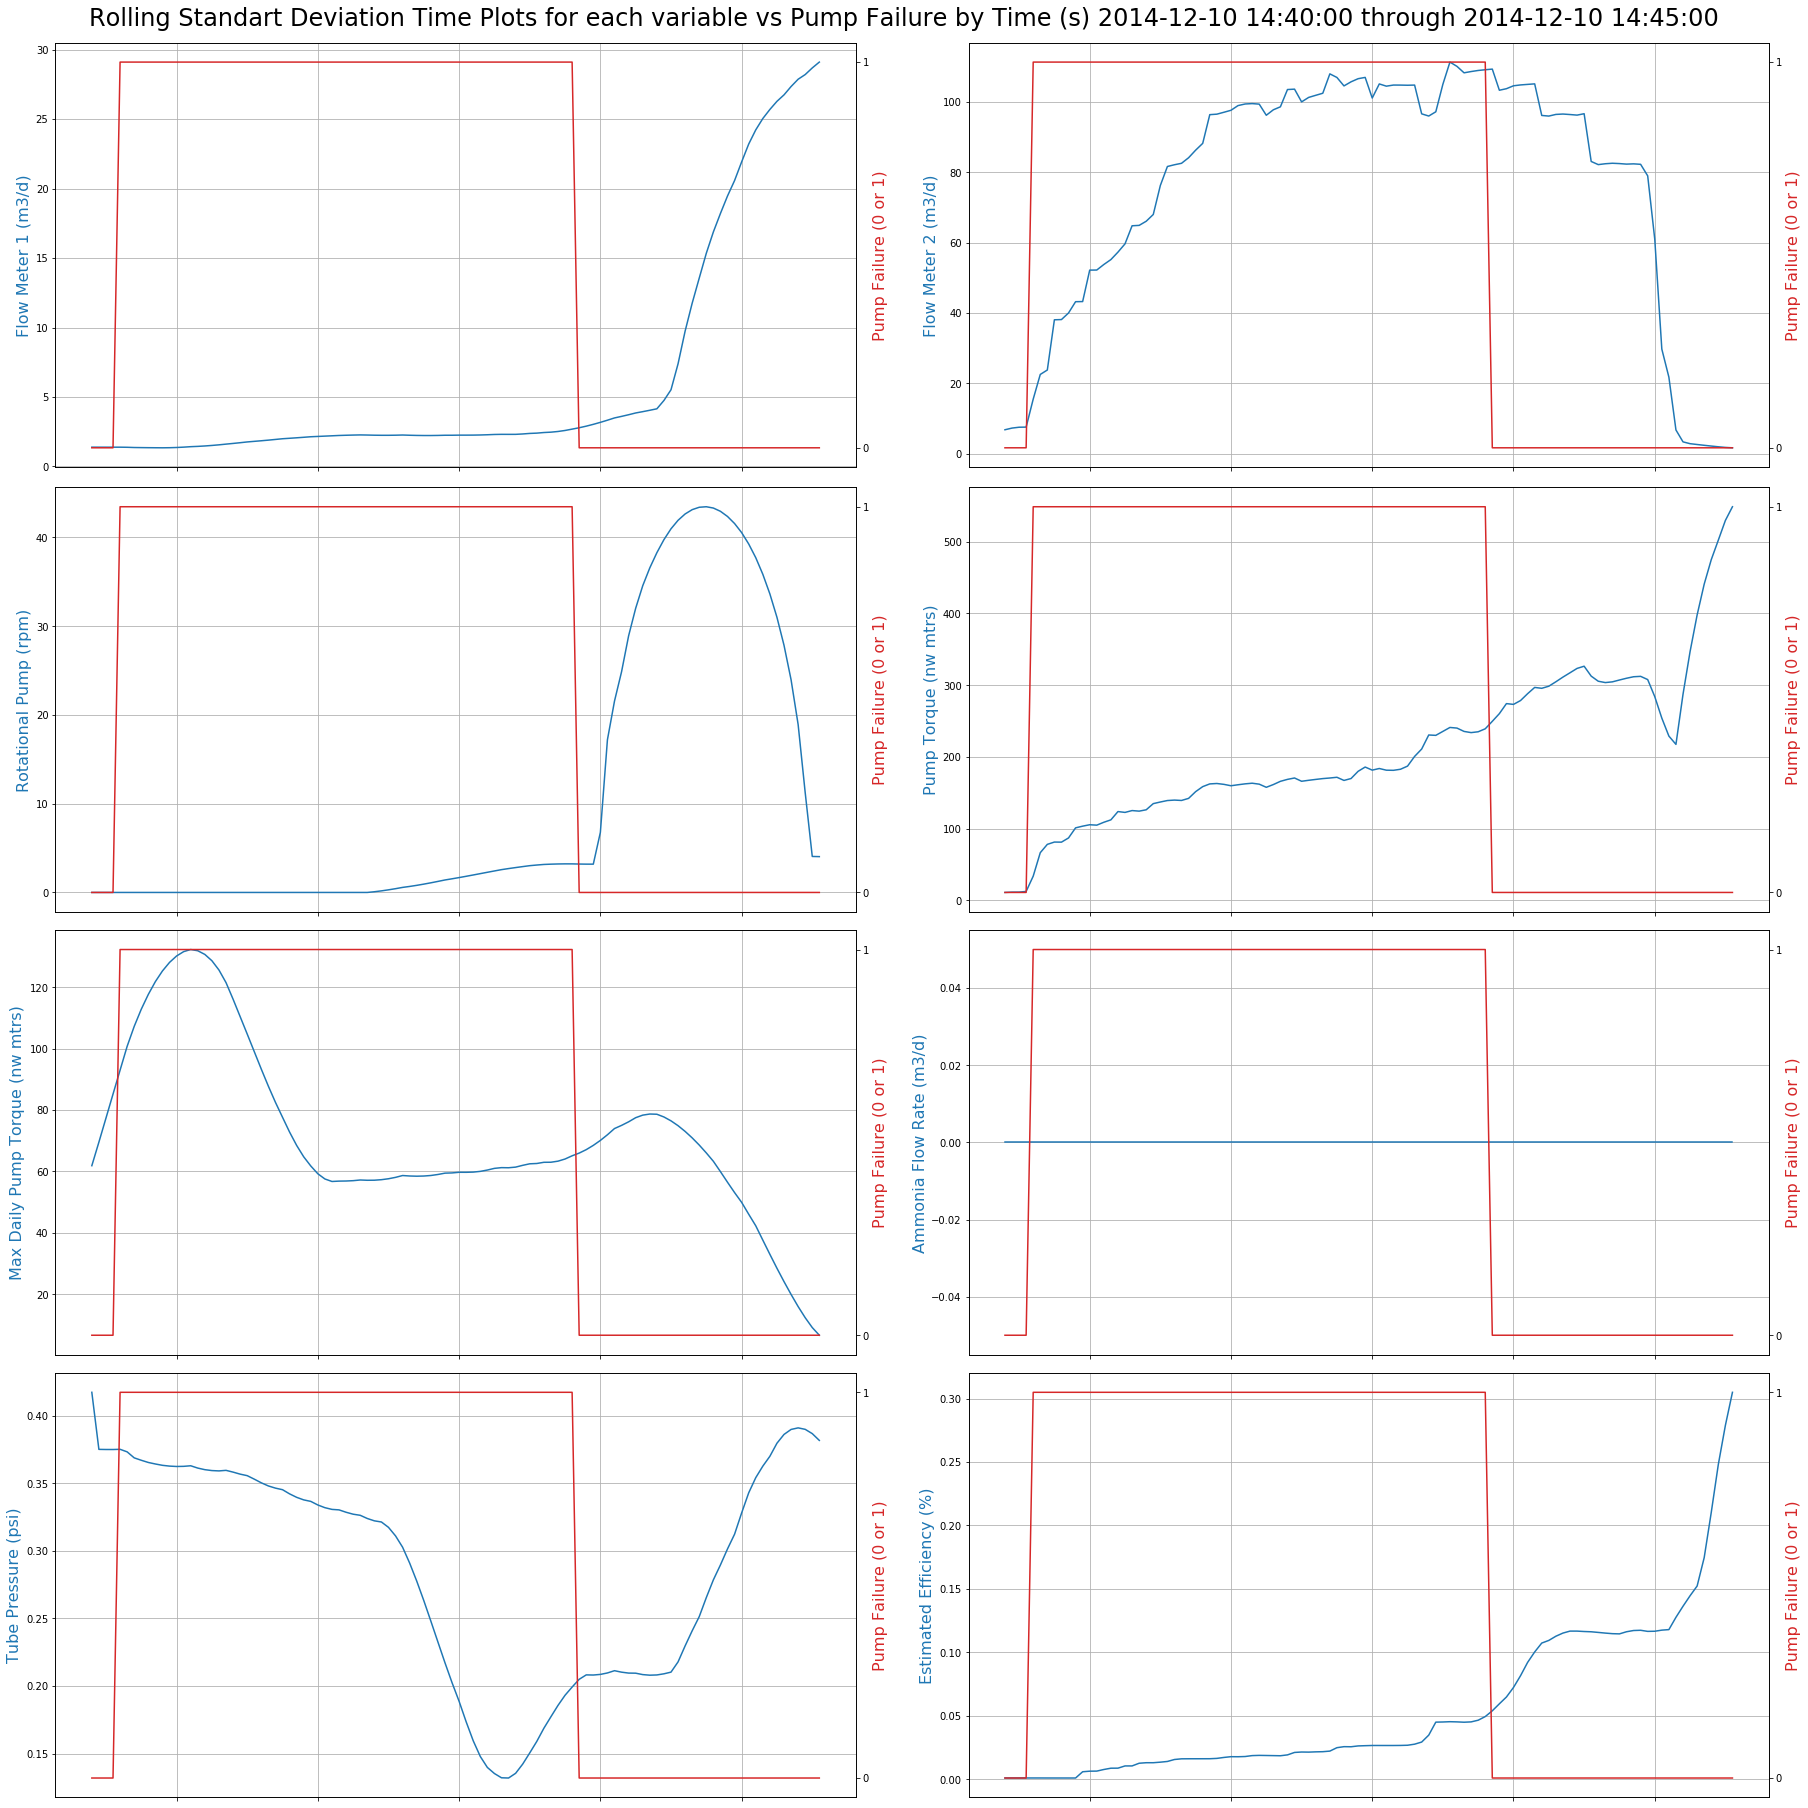

In [23]:
# iii. Create Rolling Standart Deviation Time Plots.
fig, axes = plt.subplots(4, 2, figsize=(25,25), constrained_layout=True)
fig.suptitle('Rolling Standart Deviation Time Plots for each variable vs Pump Failure by Time (s) ' 
             + min_time_fltr + ' through ' + max_time_fltr, size=24)
axes=axes.flatten()
ax1_col='tab:blue'
ax2_col='tab:red'
for i, y in enumerate(df_roll_fltr):
    ax1=axes[i]
    ax1.set_ylabel(y, color=ax1_col, size=16)
    ax1.plot(df_roll_fltr.index, df_roll_fltr[y], color=ax1_col)
    plt.setp(ax1.get_xticklabels(), visible=False)
    ax1.grid(True)
    ax2=ax1.twinx()
    ax2.grid(False)
    ax2.set_ylabel('Pump Failure (0 or 1)', color=ax2_col, size=16)
    ax2.plot(df_roll_fltr.index, df_time_fltr['Pump Failure (1 or 0)'], color=ax2_col)
    plt.yticks((0,1))

#### Answer: Yes, these Flow Meter 1 (m3/d), Flow Meter 2 (m3/d), Rotational Pump (rpm), Pump Torque (nw mtrs) and Max Daily Pump Torque (nw mtrs) variables seem to move in relation to the failure event.
---

### Part II: <span style="color:blue">Inferential Statistical Analysis</span>

### Step 11: <span style="color:purple">Create a Heatmap</span> 

In [24]:
# i. Filter out (excluding those with consistent 0 values such as Ammonia Flow Rate).
df_corr_filt=df_all.filter(['Flow Meter 1 (m3/d)', 'Flow Meter 2 (m3/d)', 'Rotational Pump (rpm)',
                        'Pump Torque (nw mtrs)', 'Max Daily Pump Torque (nw mtrs)', 
                        'Tube Pressure (psi)', 'Estimated Efficiency (%)', 'Pump Failure (1 or 0)'])

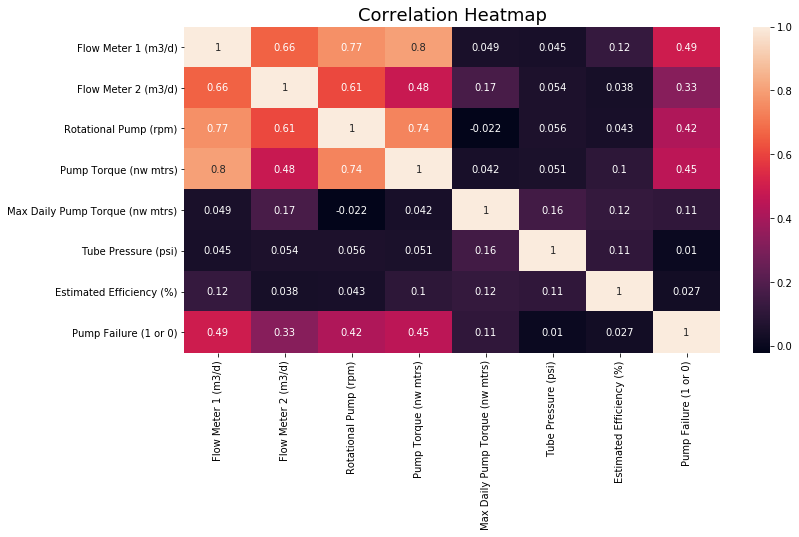

In [25]:
# ii. Create a correlation heatmap for all variables for above dataframe.
fig, axis=plt.subplots(figsize=(12,6))
df_corr=df_corr_filt.corr()
plt.title('Correlation Heatmap', fontsize=18)
ax=sns.heatmap(df_corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Step 12: <span style="color:purple">Create a Barplot of Correlated Features</span>
**Open-ended Question:** Which variables seem to correlate with Pump Failure?

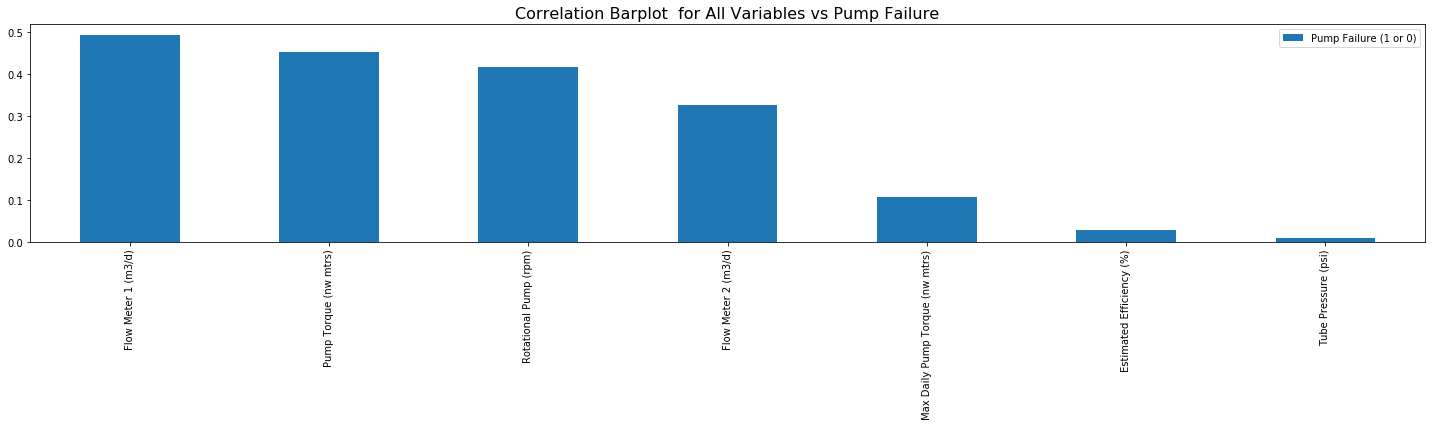

In [26]:
# Create a barplot that shows the correlated features against PUMP FAILURE (1 or 0), in descending order.
x_df_corr=df_corr.loc[:, ['Flow Meter 1 (m3/d)', 'Flow Meter 2 (m3/d)', 'Rotational Pump (rpm)',
                          'Pump Torque (nw mtrs)', 'Max Daily Pump Torque (nw mtrs)', 
                          'Tube Pressure (psi)', 'Estimated Efficiency (%)']]
y_df_corr=df_corr.loc[:, ['Pump Failure (1 or 0)']]
y_nodep=y_df_corr.drop('Pump Failure (1 or 0)')
y_sort=y_nodep.sort_values(by=['Pump Failure (1 or 0)'], ascending=False)
y_sort.plot(kind='bar', figsize=(25,4))
plt.title('Correlation Barplot  for All Variables vs Pump Failure', fontsize=16)
plt.show()

#### Answer: These Flow Meter 1 (m3/d), Pump Torque (nw mtrs), Rotational Pump (rpm) and  Flow Meter 2 (m3/d) variables have a relatively strong relationship with the Pump Fialure event.
---

### Step 13: <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span> 

In [27]:
# i. Apply a rolling standard deviation to the dataframe using a rolling window size of '30'.
df_rollstd30 = df_corr_filt.rolling(window=30).std()
df_corr_roll=round(df_rollstd30.corr(), 2)

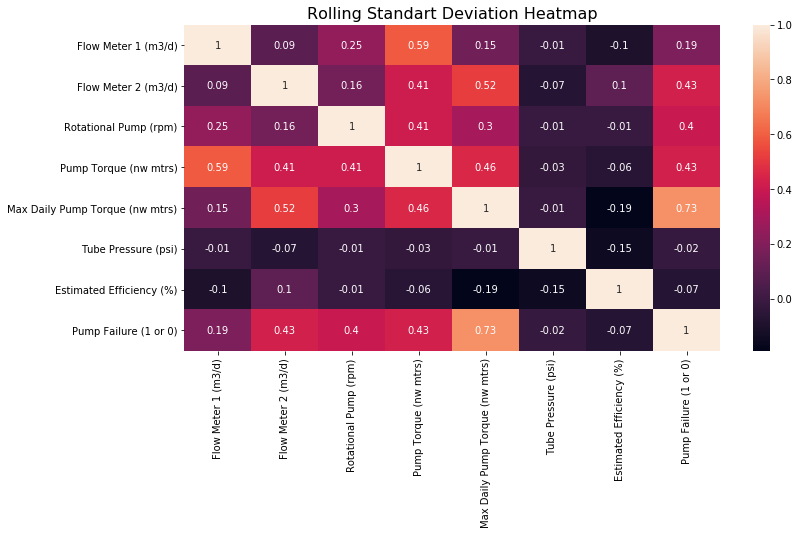

In [28]:
# ii. Replot this dataframe into a heatmap.
fig, axis=plt.subplots(figsize=(12,6))
plt.title('Rolling Standart Deviation Heatmap', fontsize=16)
ax=sns.heatmap(df_corr_roll, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

#### Based on the correlation heatmaps I've created, the most of variables, which are Flow Meter 1 , Flow Meter 2, Rotational Pump, Pump Torque, and Max Daily Pump Torque stand out for the Pump Failure prediction.
---
                         

### Creating a Multivariate Regression Model


I went through the tricky process of using the rolling standard deviation variables to generate a regression equation. Happily, this process is much simpler in Python.  

For this step, I'll be using the statsmodel.api library you imported earlier and calling the Ordinary Least Squares Regression to create a multivariate regression model (which is a linear regression model with more than one independent variable).

### Step 14: <span style="color:purple">Use OLS Regression</span> 

**Open-ended Question:** Which linear regression model seems to be a better fit?

#### OLS Regression Model 1:

In [29]:
# i. Create dataframes for all the independent variavbles and the dependent variable (Pump Failure).
indep1=df_all.loc[:, ['Flow Meter 1 (m3/d)', 'Flow Meter 2 (m3/d)', 'Rotational Pump (rpm)', 
                     'Pump Torque (nw mtrs)', 'Max Daily Pump Torque (nw mtrs)', 
                     'Ammonia Flow Rate (m3/d)', 'Tube Pressure (psi)', 'Estimated Efficiency (%)']]
dep1=df_all.loc[:, ['Pump Failure (1 or 0)']]

In [30]:
# ii. Create a regression equation that models the Pump Failure (Y-Variable) against all the independent variables 
# using the OLS Regression Model in the statsmodel.api library.
model1=sm.OLS(dep1, indep1).fit()
predic1 = model1.predict(indep1)
print(model1.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Pump Failure (1 or 0)   R-squared (uncentered):                   0.271
Model:                               OLS   Adj. R-squared (uncentered):              0.270
Method:                    Least Squares   F-statistic:                              370.5
Date:                   Tue, 21 Apr 2020   Prob (F-statistic):                        0.00
Time:                           19:40:52   Log-Likelihood:                          7544.7
No. Observations:                   6997   AIC:                                 -1.508e+04
Df Residuals:                       6990   BIC:                                 -1.503e+04
Df Model:                              7                                                  
Covariance Type:               nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025   

#### OLS Regression model 2:

In [31]:
# iii.Create dataframes for the rolling standard deviation variables I created previously.
indep_roll_std30 = indep1.rolling(window=30).std()
indep_roll_std30.dropna(inplace=True)
indep_roll_std30=indep_roll_std30.join(df_all[['Pump Failure (1 or 0)']], how='inner')
indep_nonan=indep_roll_std30.loc[:, ['Flow Meter 1 (m3/d)', 'Flow Meter 2 (m3/d)', 
                                     'Rotational Pump (rpm)', 'Pump Torque (nw mtrs)', 
                     'Max Daily Pump Torque (nw mtrs)', 'Ammonia Flow Rate (m3/d)', 
                       'Tube Pressure (psi)', 'Estimated Efficiency (%)']]
dep_nonan=indep_roll_std30.loc[:, ['Pump Failure (1 or 0)']]

In [32]:
# iiii. Create regression model for the rolling standard deviation variables.
model2=sm.OLS(dep_nonan, indep_nonan).fit()
print(model2.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Pump Failure (1 or 0)   R-squared (uncentered):                   0.623
Model:                               OLS   Adj. R-squared (uncentered):              0.622
Method:                    Least Squares   F-statistic:                              1640.
Date:                   Tue, 21 Apr 2020   Prob (F-statistic):                        0.00
Time:                           19:40:52   Log-Likelihood:                          9793.6
No. Observations:                   6968   AIC:                                 -1.957e+04
Df Residuals:                       6961   BIC:                                 -1.953e+04
Df Model:                              7                                                  
Covariance Type:               nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025   

#### Answer: The rolling standard deviation linear regression model (Model 2)  seems to be a better fit  for 'PUMP FAILURE prediction beacuase the R Squared (0.62) for the model is relatively higher.
---

### Step 15: <span style="color:purple">Validate Predictions</span> 

In [33]:
# i. Predict both models  to see whether or not our model 'picks' up the Pump Failure Event.
predict1=model1.predict(indep1)
predict2=model2.predict(indep_nonan)

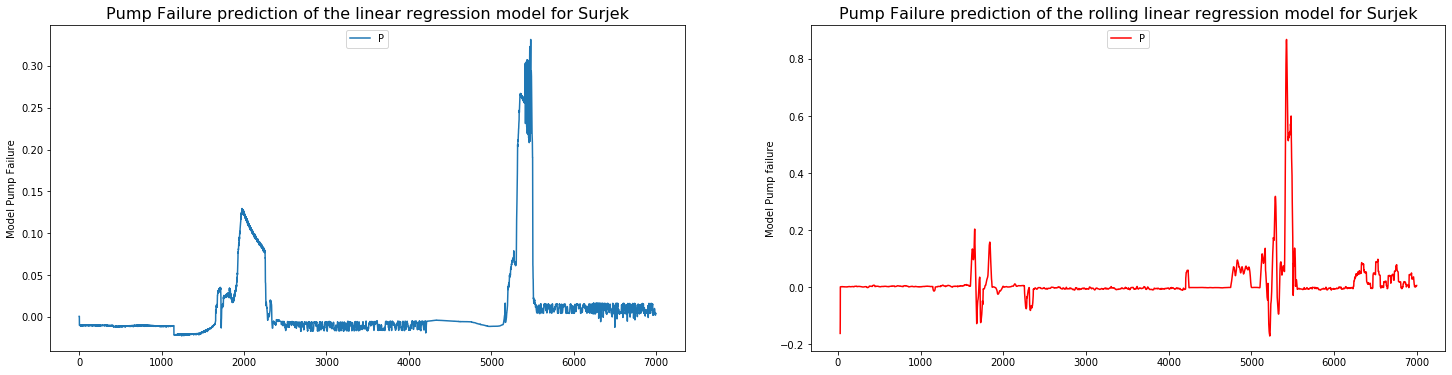

In [34]:
# ii. Plot the rolling linear regression equation against the attribute 'PUMP FAILURE (1 or 0)'
plt.figure(figsize=(25,6))
plt.subplot(1, 2, 1)
sns.lineplot(data=predict1)
plt.title('Pump Failure prediction of the linear regression model for Surjek', fontsize=16)
plt.ylabel('Model Pump Failure')
plt.legend('Prediction', loc='upper center')
plt.subplot(1, 2, 2)
sns.lineplot(data=predict2, color='red')
plt.title('Pump Failure prediction of the rolling linear regression model for Surjek', fontsize=16)
plt.legend('Prediction', loc='upper center')
plt.ylabel('Model Pump failure')
plt.show()

## Thank you!